In [1]:
import numpy as np
from scipy.special import erf
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.path import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches

#from mpl_toolkits.axes_grid import inset_locator
from mpl_toolkits.axes_grid1 import inset_locator

%matplotlib inline

Implementation of this plot is not ideal and should be worked on more. 

Using matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

In [2]:
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.9.2 | packaged by conda-forge | (default, Feb 21 2021, 05:02:46) 
[GCC 9.3.0] 

Matplotlib version is 3.4.2 

Matplotlibrc file is matplotlibrc



## Use matlotlib colors

In [3]:
colors = [c['color'] for c in mpl.rcParams['axes.prop_cycle']]

## Make fake data

In [4]:
T = np.arange(10, 300, 20)
Tc = 200
t = (Tc-T)/Tc
t[t<0] = 0
r = 0.7*np.sqrt(t)
r += 0.05*np.random.rand(T.size)

r_error = 0.03 + 0.01*np.random.rand(T.size)

fwhm = 0.04*erf( (T-Tc)/10 ) + 0.002*np.random.rand(T.size)

fwhm_error = 0.005 + 0.001*np.random.rand(T.size)

X, Y = np.meshgrid(np.arange(50), np.arange(50))

M1 = np.exp( -( ((X-20)/5)**2 + ((Y-30)/10)**2) )


## Create figure

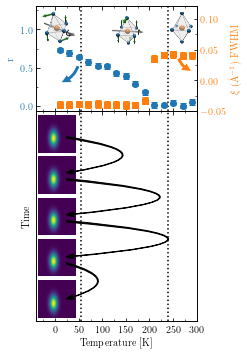

In [5]:
fig = plt.figure(figsize=(3+3/8, 5))

gs_main = gridspec.GridSpec(2, 1, height_ratios=[1,2], hspace=0, wspace=0,
                            left=0.14, right=0.8,
                           bottom=0.075, top=0.95)

axtop = fig.add_subplot(gs_main[0])
axbottom = fig.add_subplot(gs_main[1])

images = 5
gap = 0.03
width = 0.3
xlim=[-40, 300]
axbottom.set_xlim(xlim)
gs1 = gridspec.GridSpecFromSubplotSpec(images*2+1, 3, subplot_spec=gs_main[1],
                                      width_ratios=[-0.08, 0.4, 0.6], wspace=0., hspace=0.,
                                      height_ratios=[gap]+ [width, gap]*images)

inset_axes = [fig.add_subplot(gs1[row, 1]) for row in range(1, images*2+1, 2)]

[inset_ax.axis('off') for inset_ax in inset_axes]

## Top panel
axtop.errorbar(T, r, r_error, fmt='o', color=colors[0])

axtop_right = axtop.twinx()
axtop_right.errorbar(T, fwhm, fwhm_error, fmt='s', color=colors[1])

axtop.set_xlabel('T (K)')
axtop.set_ylabel('r', color=colors[0])
axtop_right.set_ylabel(r'$\xi$ (\AA{}$^{-1}$) FWHM', color=colors[1])
axtop_right.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))


for ax, color in zip([axtop, axtop_right], colors):
    for t in ax.get_yticklabels():
        t.set_color(color)

axtop.set_xlim(xlim)
axtop.xaxis.set_major_locator(ticker.MultipleLocator(50))
axtop.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))

axtop.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

axtop.xaxis.set_ticklabels([])

# Add arrows
arrow_l = patches.FancyArrowPatch(
        (50, 0.55),
        (7, 0.3),
        connectionstyle='arc3, rad=-0.3',
        mutation_scale=20, 
    facecolor=colors[0],
    edgecolor='w', 
    )

arrow_r = patches.FancyArrowPatch(
        (260, 0.65),
        (295, 0.45),
        connectionstyle='arc3, rad=0.3',
        mutation_scale=20, 
    facecolor=colors[1],
    edgecolor='w', 
    )

[axtop.add_patch(arr) for arr in [arrow_l, arrow_r]]

## Bottom panel
axbottom.set_ylim([0, 6.5])
axbottom.yaxis.set_ticks([])
axbottom.set_xlim(xlim)
axbottom.xaxis.set_major_locator(ticker.MultipleLocator(50))
axbottom.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))

axbottom.set_xlabel('Temperature [K]')
axbottom.set_ylabel('Time')

# add insets 

for inset_ax in inset_axes:
    inset_ax.imshow(M1)

axtop.set_ylim(top=1.3)
axtop_right.set_ylim(top=0.12)
axpics = []
for x, scale, filename in zip([0.16, 0.45, 0.69], [0.00013, 0.00012, 0.00011],
                              ['LTT.png', 'LTO.png', 'HTT.png']):
    im = plt.imread(filename)
    h = scale * im.shape[0]
    w = scale * im.shape[1]
    axpic = fig.add_axes([x, 0.825, w, h])
    axpic.imshow(im)
    axpic.axis('off')
    axpics.append(axpics)
    

# Mark temperatures
axtop.axvline(x=55, linestyle=':', color='k')
axtop.axvline(x=240, linestyle=':', color='k')
axbottom.axvline(x=55, linestyle=':', color='k')
axbottom.axvline(x=240, linestyle=':', color='k')
    
# add Tcycle arrows 

axbottom_for_arrows = fig.add_subplot(gs_main[1], alpha=0.5)
axbottom_for_arrows.axis(axbottom.axis())
axbottom_for_arrows.axes.get_xaxis().set_visible(False)
axbottom_for_arrows.axes.get_yaxis().set_visible(False)
axbottom_for_arrows.patch.set_alpha(0)

locs = np.arange(5.7, 1, -1.3) # start points of arrows
#[5.7, 4.5, 3.3, 2.1] 
Tcycles = np.array([150, 240, 260, 90]) * 1.75
jump = -1.1
arrowstyle = patches.ArrowStyle("Fancy", head_length=1.5, head_width=1,
                                tail_width=0.3)

for loc, Tcycle in zip(locs, Tcycles):
    verts = [
        [24, loc],  # P0
        [Tcycle, loc+jump/2], # P1
        [24, loc+jump], # P3
        ]

    codes = [Path.MOVETO,
             Path.CURVE3,
             Path.CURVE3,
             ]

    arrow_path = Path(verts, codes)
    

    arrow = patches.FancyArrowPatch(path=arrow_path,
                      facecolor='k', edgecolor='k',
                      arrowstyle=arrowstyle, mutation_scale=5)
    axbottom_for_arrows.add_patch(arrow)


fig.savefig('ex_09_time_vs_T.pdf', dpi=600)